# 常见的XY类型图

* 作为前一文档的小拓展，这里是其他一些较为常见的XY类型图。
* 即[官方文档](https://matplotlib.org/stable/users/index.html)中[图表类型](https://matplotlib.org/stable/plot_types/index.html)的“Pairwise data”部分。
* 目前本文档包括：散点图、密度散点图。
* 折线图在前一文档中有所提及，因此此处没有进行展示。

In [1]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
from mpl_scatter_density import ScatterDensityAxes

## 散点图

* 散点图至少包含了一组点的x轴坐标、y轴坐标，即$\left( X, Y \right)$。
* 在此基础上可以添加一维或两维数据。
* 所添加的数据可以对应各个点的大小或颜色，即$\left( X, Y, S, C \right)$。

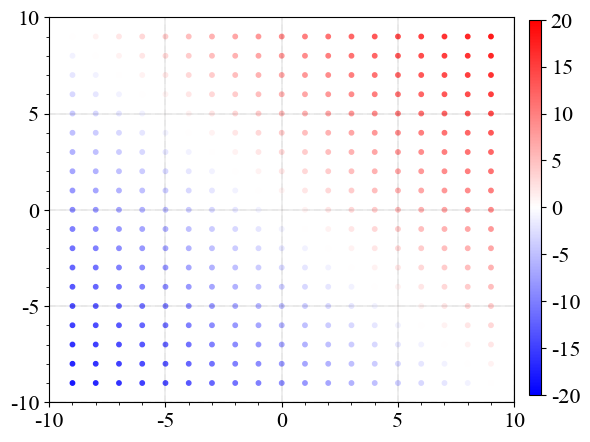

In [2]:
# ==创建示例数据==
# 创建两个表示网格坐标的二维数组
# x轴、y轴方向上的范围都是从-9到9，共19个点，即各个点之间的间隔为1
# 最后得到19x19的网格点
x, y = np.mgrid[-9:9:19j, -9:9:19j]
# 绘图时19x19的每个格点都将按照此变量的值进行上色
# 即各个格点的x轴、y轴坐标值之和
z = x + y

# ==创建画布与子图==
fig = plt.figure(figsize=(6, 5))
ax = fig.subplots(1, 1)

# ==绘制散点图==
# 这里的散点大小被固定成了10
# 但其实也可以像颜色那样设置成一个变量
# 这样散点的大小就会像最后图像里的颜色那样
# 随着给定的变量对应发生变化
scat = ax.scatter(
    x,  # x轴坐标
    y,  # y轴坐标
    s=10,  # 按照该变量的值调整大小
    c=z,  # 按照该变量的值进行上色
    cmap="bwr",  # 选用colormap
    norm=mcolors.Normalize(vmin=-20, vmax=20),  # 规定colorbar的最大最小值
)
# “老三样”
ax.grid(linestyle=":", linewidth=0.3, color="black")
ax.minorticks_on()
ax.tick_params(labelsize=16)
# 调整一下y轴刻度
# 否则得到的y轴刻度间隔是2.5
ax.set_yticks(np.linspace(-10, 10, 5))
# 设置x轴、y轴范围
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

# ==添加colorbar==
# 具体的一些参数说明请见下一文档
cbar = fig.colorbar(
    scat,
    orientation="vertical",
    cax=fig.add_axes([0.925, 0.125, 0.02, 0.75]),
)
cbar.ax.tick_params(labelsize=16)

# ==展示图像==
fig.show()

* 其他使用例：

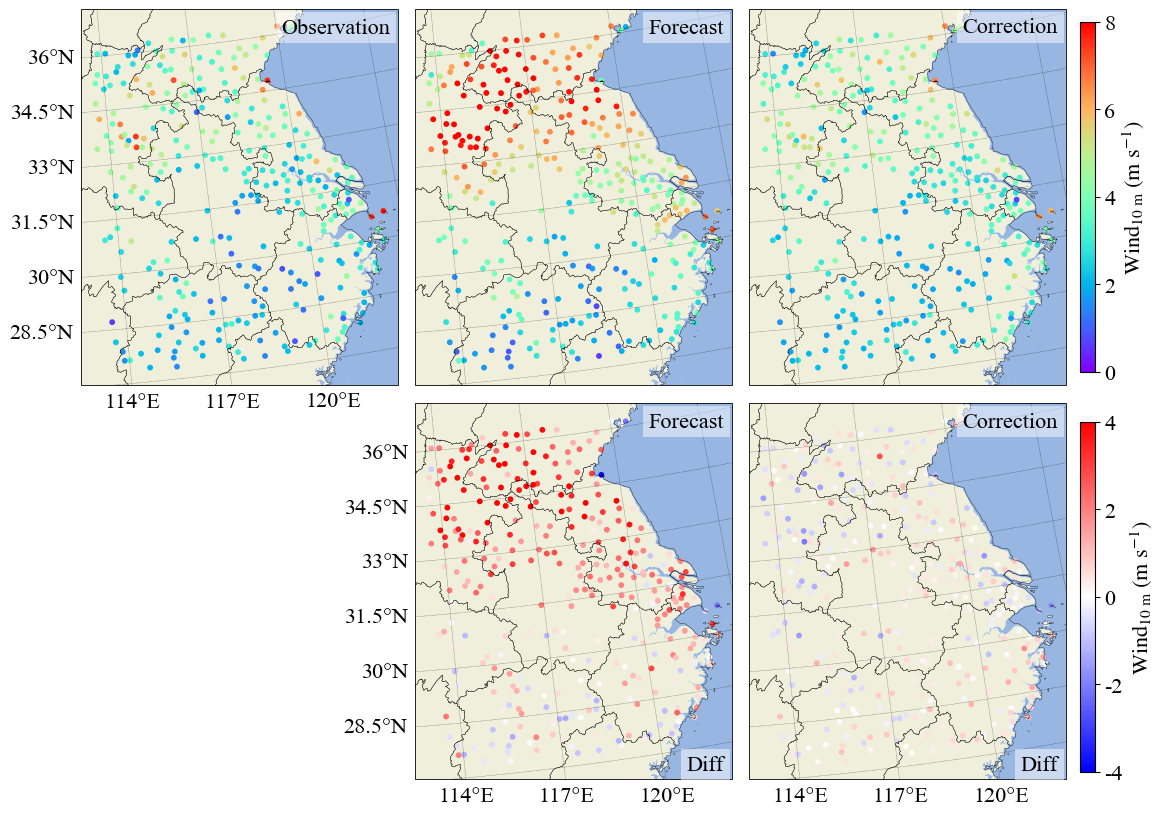

In [3]:
# 这是正常绘图所不需要的模块
# 因此将其拎出来单独导入
from IPython.display import Image

Image("/public/home/XiaAnRen/data3/vscode/python_3.11/misc/test/test_scatter.png")

## 密度散点图

* 密度散点图只需要包含一组点的x轴坐标、y轴坐标，即$\left( X, Y \right)$。
* 相比普通散点图，这里点的数目通常足够大，因此可以通过颜色的变化来展示密集程度。

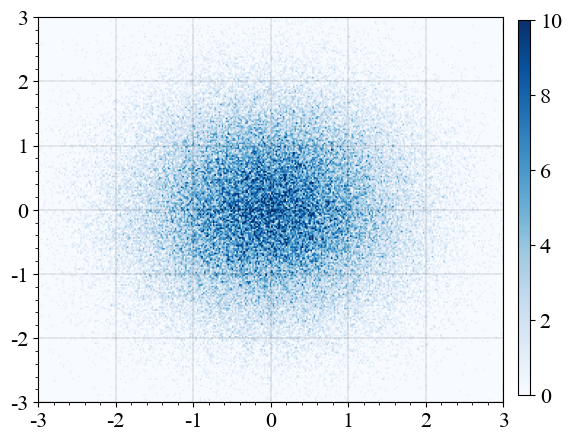

In [ ]:
# ==创建示例数据==
# 设置随机数生成器的种子为100
rng = np.random.default_rng(seed=100)
# 使用随机数生成器生成100000个服从均值为0，标准差为1的正态分布数据
# 分别用于x轴坐标、y轴坐标
x = rng.normal(loc=0, scale=1, size=100000)
y = rng.normal(loc=0, scale=1, size=100000)

# ==创建画布与子图==
fig = plt.figure(figsize=(6, 5))
# 这里的ScatterDensityAxes是在标注变量类型（type hint）
# 删掉也不影响程序的运行
# 创建的子图必须设置投影方式为scatter_density
ax: ScatterDensityAxes = fig.subplots(
    1,
    1,
    subplot_kw={"projection": "scatter_density"},
)

# ==绘制密度散点图==
# 密度散点图将按照点的密度进行上色
# 因此这里colorbar上的值代表了每个像素内点的数目
dens = ax.scatter_density(
    x,  # x轴坐标
    y,  # y轴坐标
    cmap="Blues",  # 选用colormap
    norm=mcolors.Normalize(vmin=0, vmax=10),  # 规定colorbar的最大最小值
)
# “老三样”
ax.grid(linestyle=":", linewidth=0.3, color="black")
ax.minorticks_on()
ax.tick_params(labelsize=16)
# 设置x轴、y轴范围
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

# ==添加colorbar==
cbar = fig.colorbar(
    dens,
    orientation="vertical",
    cax=fig.add_axes([0.925, 0.125, 0.02, 0.75]),
)
cbar.ax.tick_params(labelsize=16)

# ==展示图像==
fig.show()

* 其他使用例：

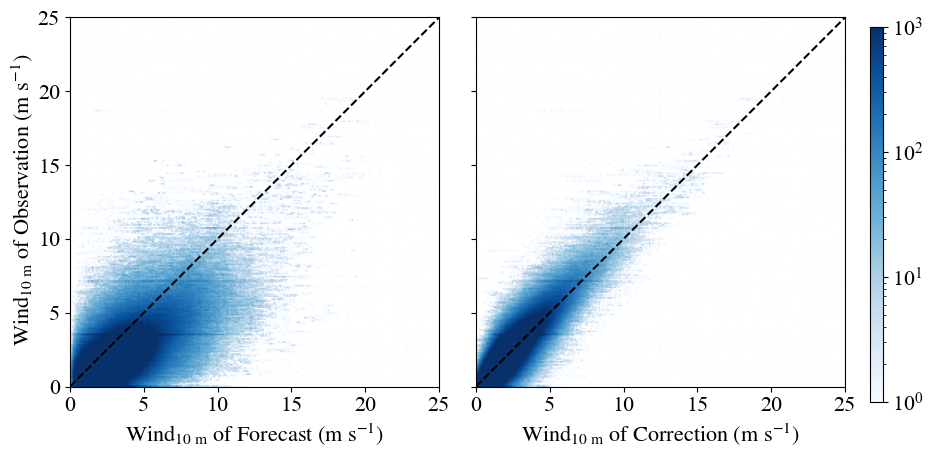

In [6]:
Image("/public/home/XiaAnRen/data3/vscode/python_3.11/misc/test/test_density.png")